In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Increase the quality and resolution of our charts so we can copy/paste or just
# directly save from here.
# See:
# https://ipython.org/ipython-doc/3/api/generated/IPython.display.html
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

# You can also just do this in Colab/Jupyter, some "magic":
# %config InlineBackend.figure_format='retina'

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
# need to run these commands the very first time you use these packages
# nltk.download('stopwords') 
# nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
df = pd.read_csv('finalnewsdataprocessed.csv')
df_final = df[['Source', 
               'Source Bias', 
               'Author', 
               'Title', 
               'Overall Sentiment',
               'compound score', 
               'negative score', 
               'positive score', 
               'neutral score']]
df_final.sort_values(by='Source')

,Source,Source Bias,Author,Title,Overall Sentiment,compound score,negative score,positive score,neutral score
1476,Al Jazeera English,-4.4,Tanvir Chowdhury,Rohingya crisis: Relocation plan meets opposition,-1,-0.6249,0.451,0.000,0.549
1160,Al Jazeera English,-4.4,Al Jazeera,"After France refused rescue ship to dock, refu...",1,0.2960,0.162,0.324,0.515
1159,Al Jazeera English,-4.4,Al Jazeera,A Place of Refuge: Malmo and Nickelsdorf,0,0.0000,0.000,0.000,1.000
733,Al Jazeera English,-4.4,Jihan Abdalla,Muslim American votes may carry outsize weight...,0,0.0000,0.000,0.000,1.000
734,Al Jazeera English,-4.4,Laurin-Whitney Gottbrath,Pandemic exacerbates barriers to voting for ho...,0,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...
172,USA Today,-1.3,"USA TODAY, Ledyard King and Phillip M. Bailey,...","'Anxious, fearful, angry.' At 50 days out to E...",-1,-0.4939,0.151,0.000,0.849
173,USA Today,-1.3,"USA TODAY, Donovan Slack, USA TODAY",Trump appointees torpedo report on voting acce...,0,0.0000,0.000,0.000,1.000
174,USA Today,-1.3,"USA TODAY, Sarah Spicer, Opinion contributor",Vulnerable Kansas bird populations are a canar...,-1,-0.2263,0.147,0.000,0.853
167,USA Today,-1.3,"USA TODAY, Suzette Hackney, USA TODAY",Honor Justice Ruth Bader Ginsburg by registeri...,1,0.7650,0.000,0.398,0.602


In [4]:
# Total number of headlines in the dataset
df['Title'].count()

1477

In [5]:
# Set style for all graphs
plt.style.use('fivethirtyeight')

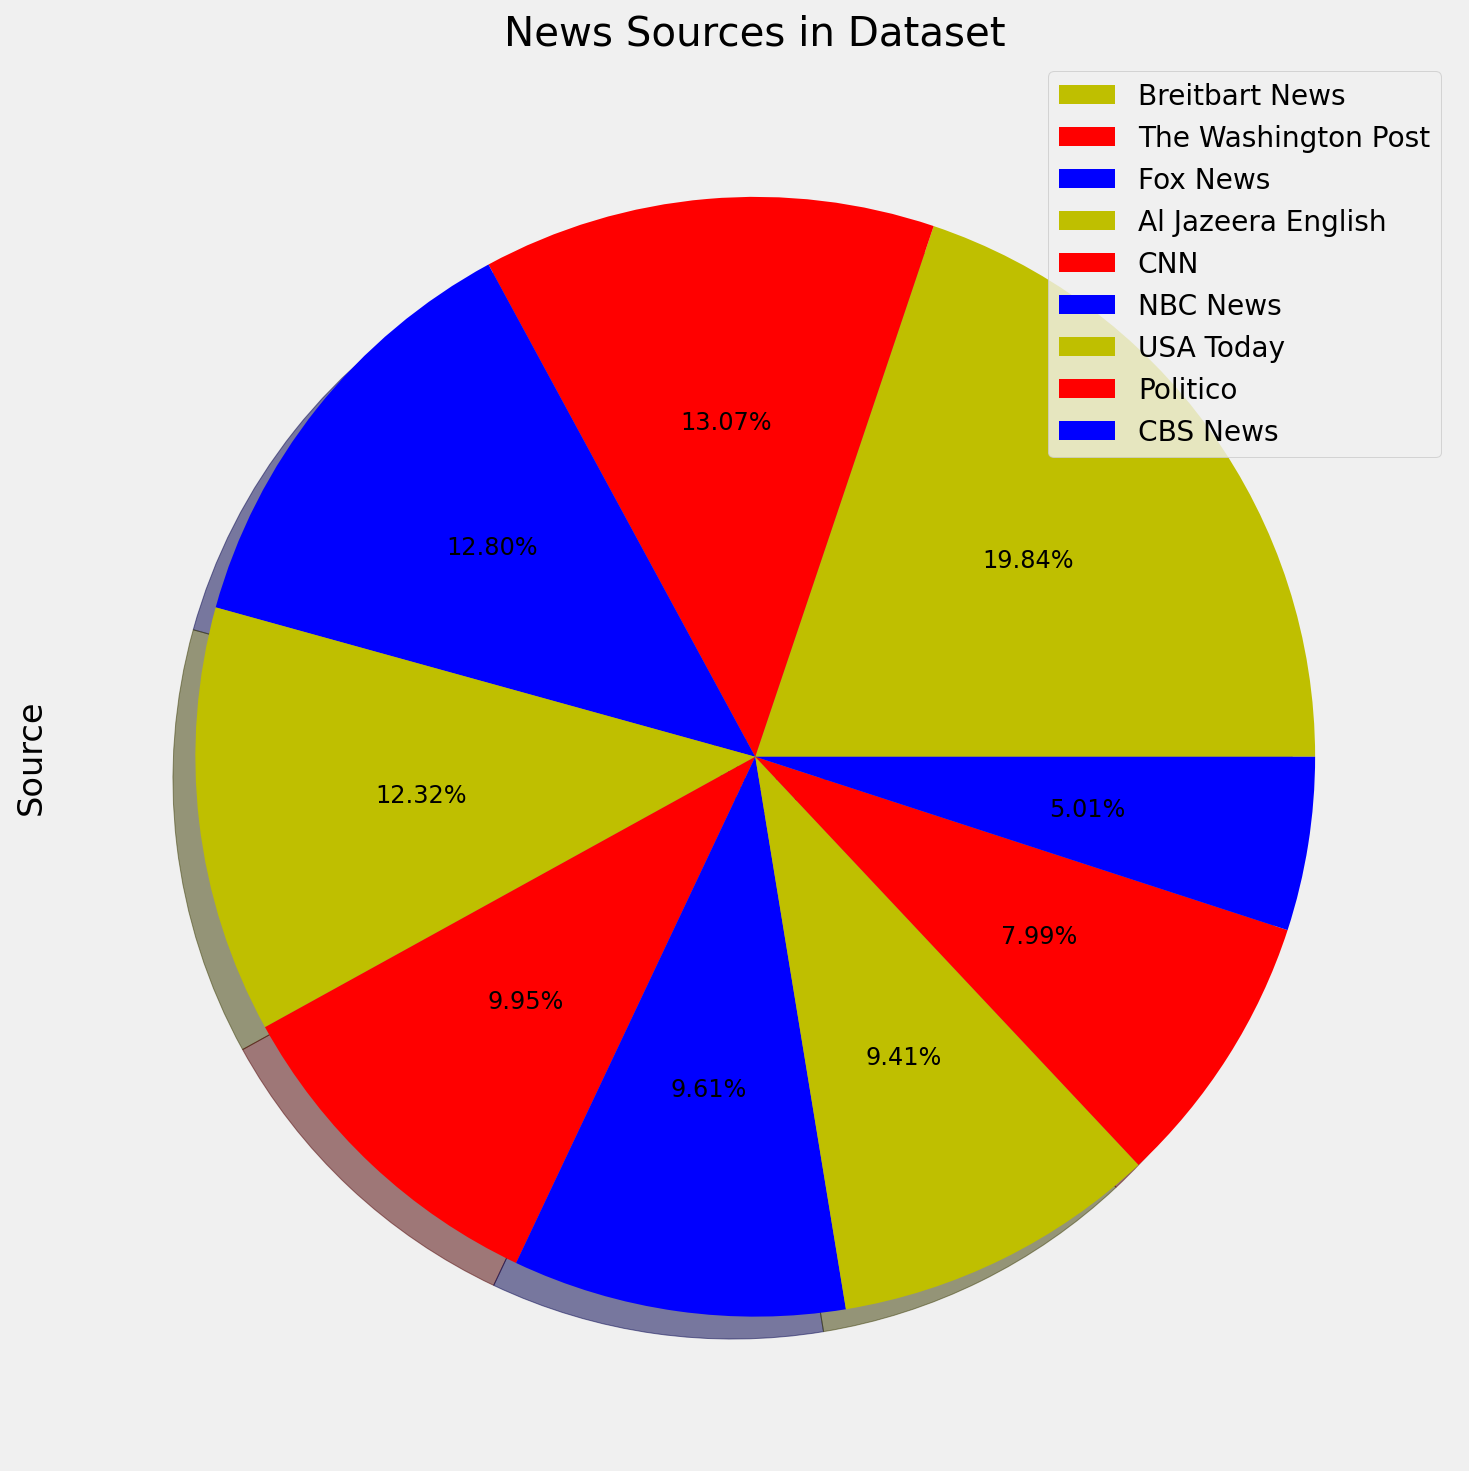

In [45]:
# Pie chart of news sources in dataset
colors = ['y', 'r', 'b']
pie = df['Source'].value_counts().plot.pie(autopct='%.2f%%', fontsize=12, figsize=(12, 12), labeldistance=None, legend=True, shadow=True, title='News Sources in Dataset', colors=colors)
pie
plt.show()


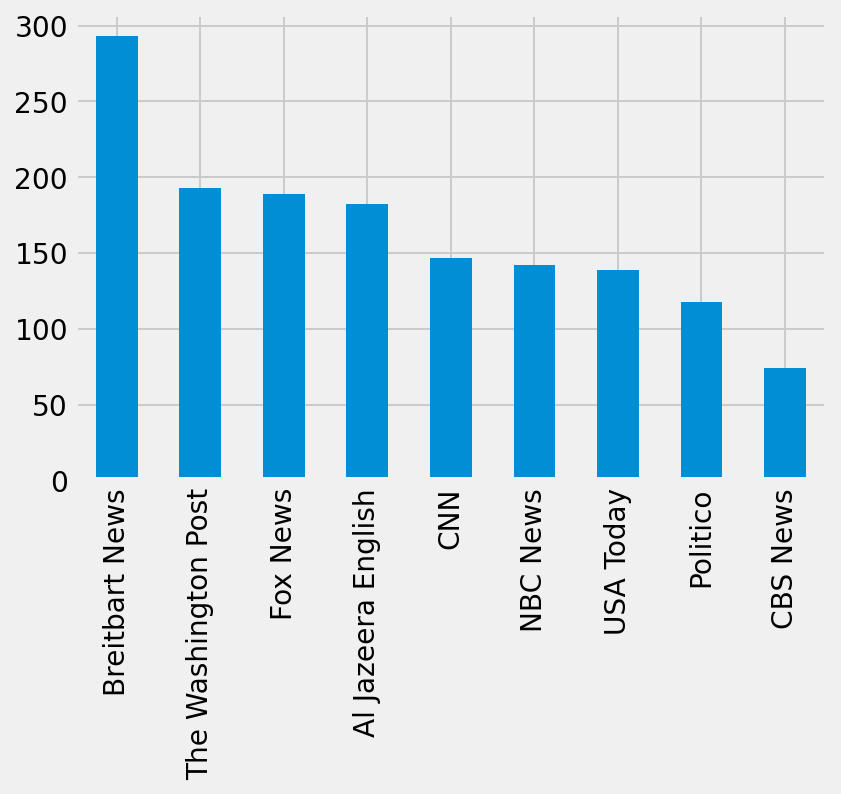

In [7]:
# Bar graph of news sources in data set
df['Source'].value_counts().plot.bar()
plt.show()


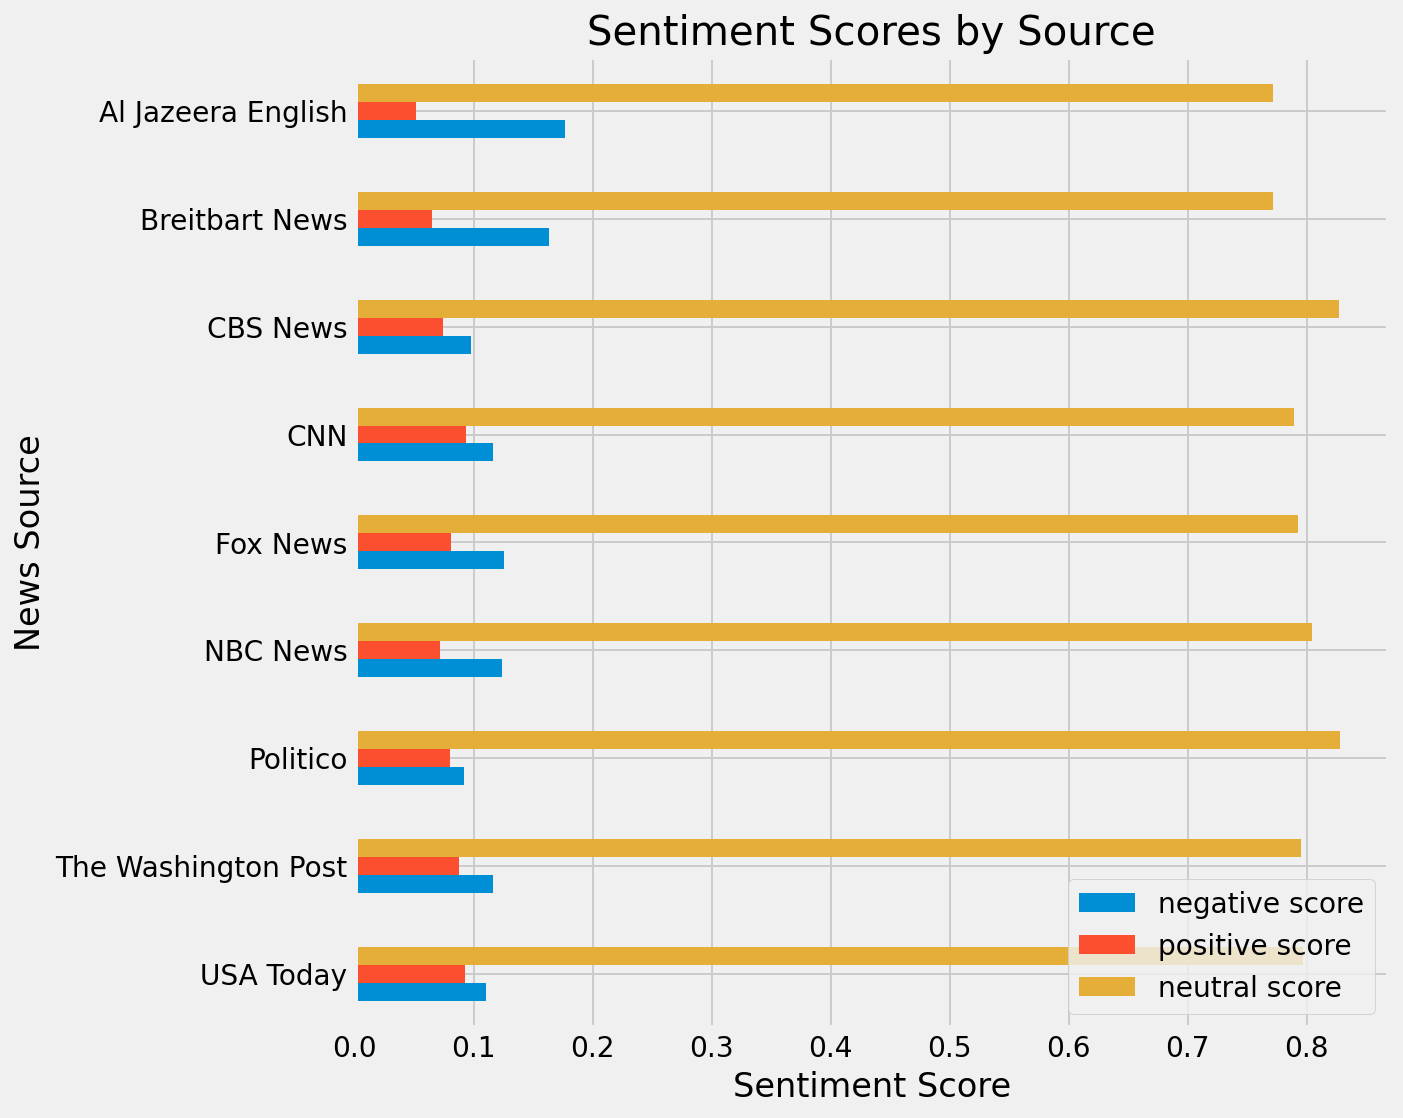

In [8]:
# Bar graph of composite sentiment scores by source
df[['Source', 'negative score', 'positive score', 'neutral score']].groupby('Source').mean().sort_values(by='Source', ascending=False).plot.barh(figsize=(10, 8), title = 'Sentiment Scores by Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.tight_layout()
scores = df.groupby('Source').mean()


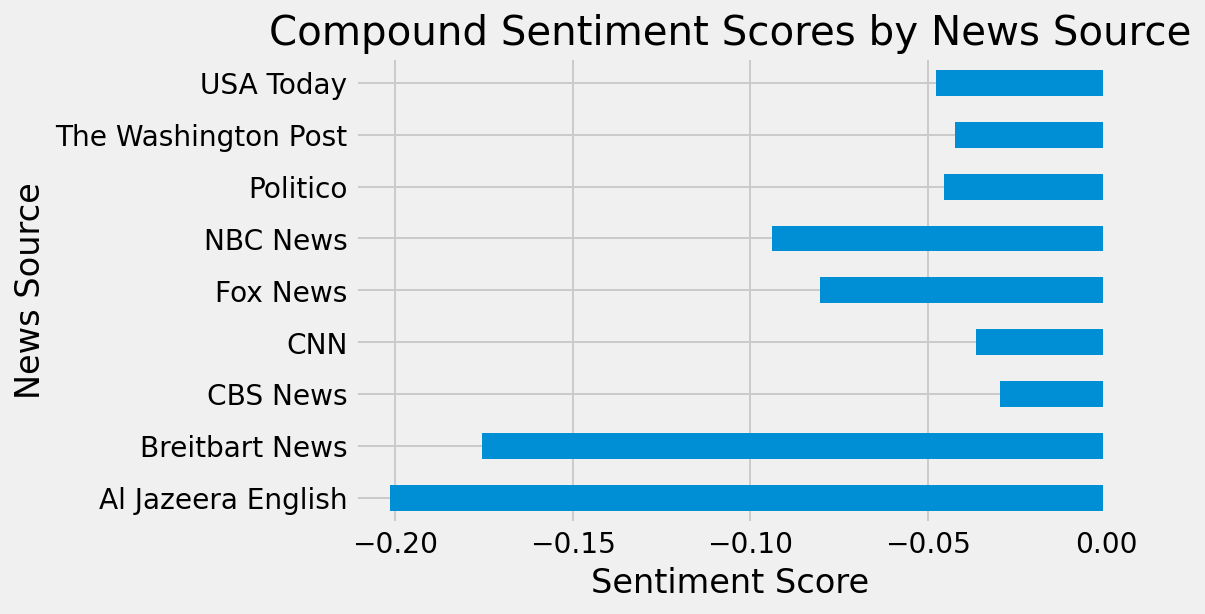

In [9]:
# Bar graph of compound sentiment scores by source
scores['compound score'].plot.barh(title='Compound Sentiment Scores by News Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.show()

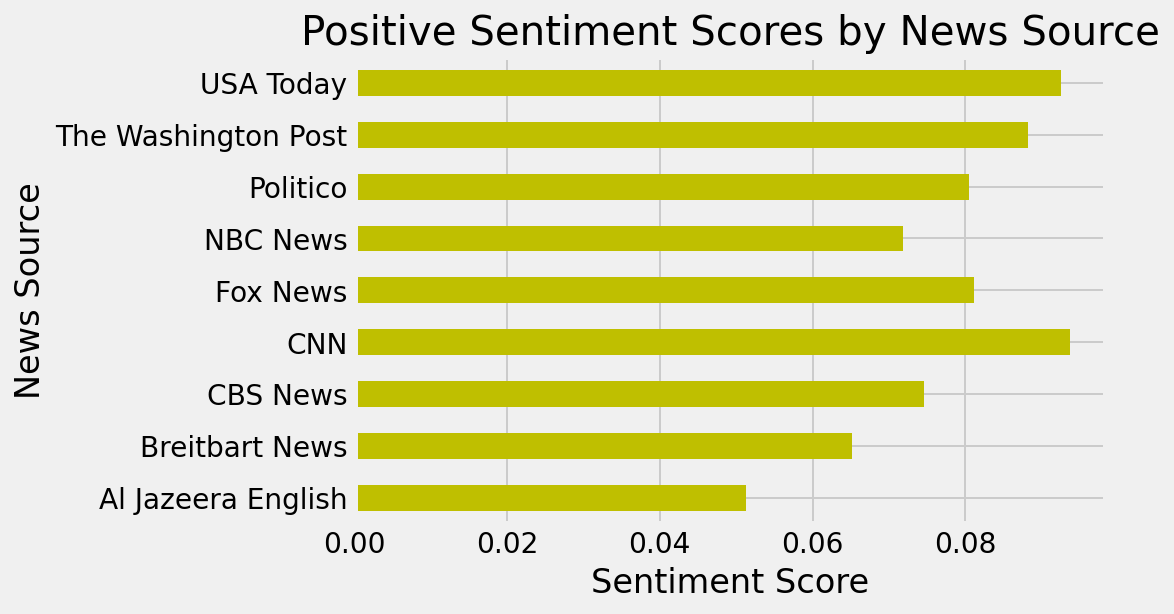

In [10]:
# Bar graph of positive sentiment scores by source 
scores['positive score'].plot.barh(color='y', title='Positive Sentiment Scores by News Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.show()

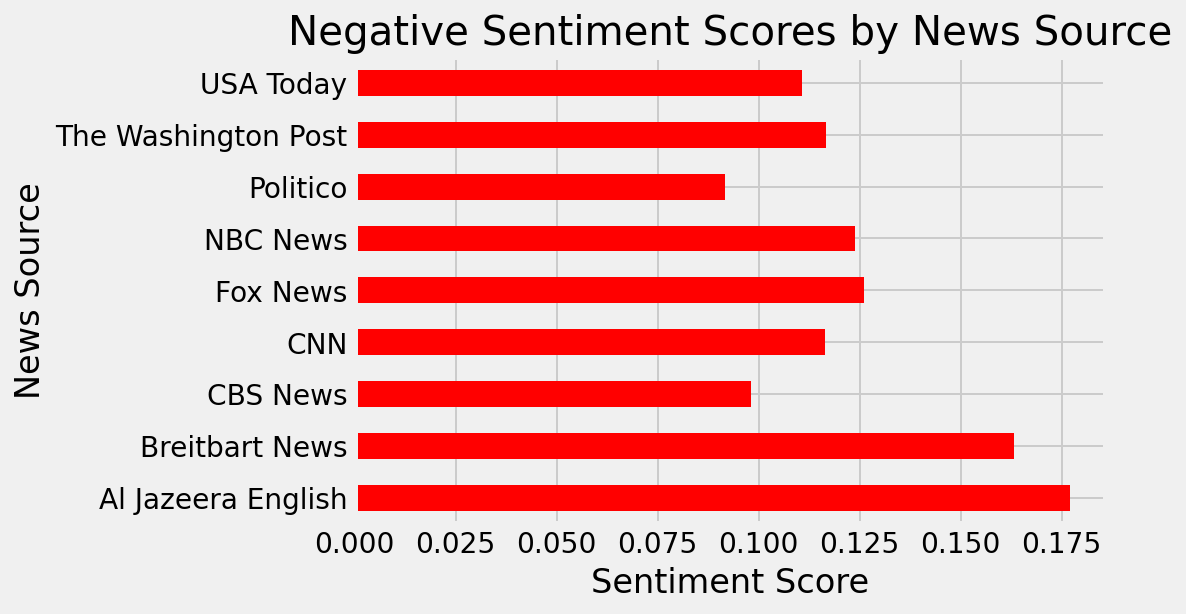

In [11]:
# Bar graph of negative sentiment score by source
scores['negative score'].plot.barh(color='r', title='Negative Sentiment Scores by News Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.show()

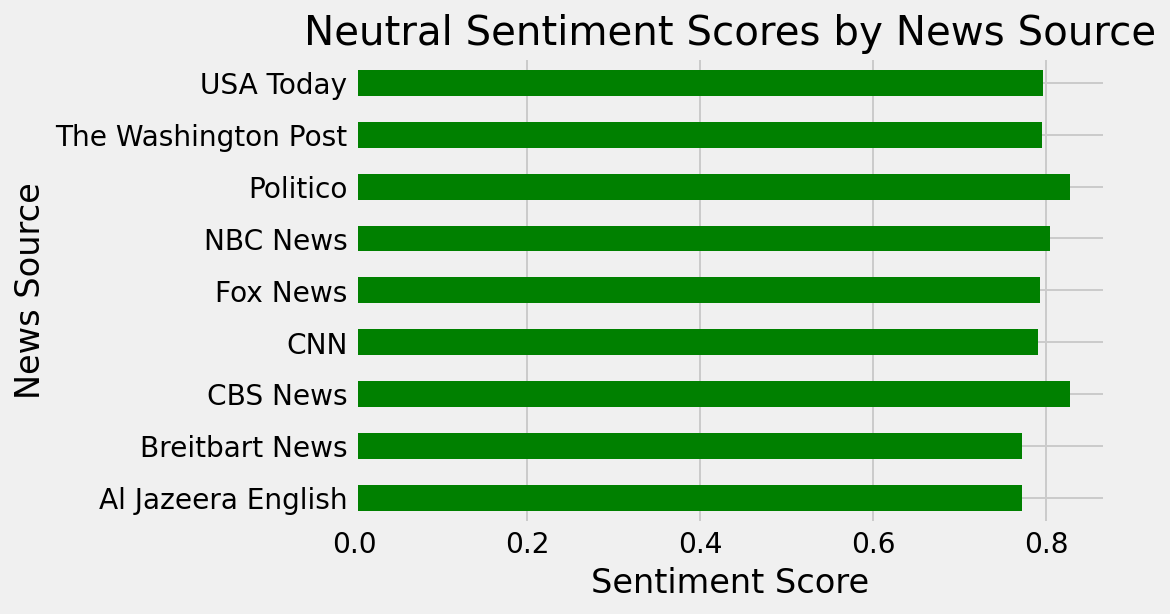

In [12]:
# Bar graph of neutral sentiment score by source
scores['neutral score'].plot.barh(color='green', title='Neutral Sentiment Scores by News Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.show()

In [13]:
# Average sentiment scores
scores

,compound score,negative score,positive score,neutral score,Overall Sentiment,Source Bias
Source,,,,,,
Al Jazeera English,-0.201256,0.177148,0.051253,0.771615,-0.368132,-4.4
Breitbart News,-0.175600,0.163249,0.065174,0.771573,-0.259386,2.9
CBS News,-0.029945,0.098068,0.074622,0.827324,-0.081081,-1.6
CNN,-0.036549,0.116354,0.093782,0.789871,-0.054422,-2.2
Fox News,-0.080363,0.125974,0.081153,0.792857,-0.137566,2.0
NBC News,-0.094059,0.123754,0.071873,0.804394,-0.176056,-2.1
Politico,-0.045558,0.091593,0.080492,0.827924,-0.093220,-3.5
The Washington Post,-0.042474,0.116705,0.088181,0.795119,-0.051813,-3.7
USA Today,-0.047829,0.110719,0.092518,0.796777,-0.086331,-1.3


In [14]:
# Calculate mean compound score 
mean_compound = df['compound score'].mean()
print(f'The average compound sentiment score is {mean_compound:.2f}.')

The average compound sentiment score is -0.10.


C:\Users\rec42\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


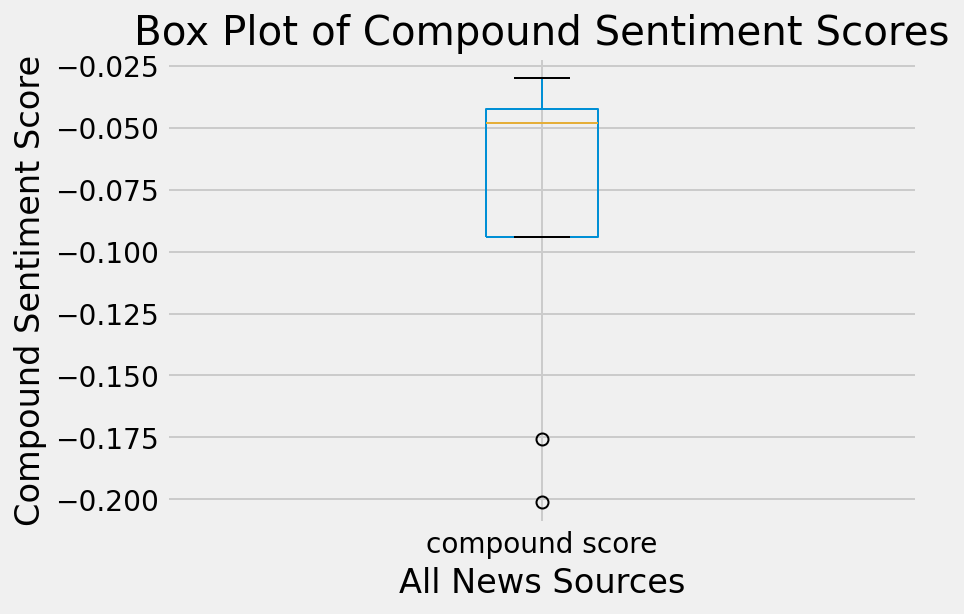

In [52]:
# Box plot of average compound score
scores['compound score'].plot.box(title='Box Plot of Compound Sentiment Scores')
ax1 = plt.axes()
x_axis = ax1.xaxis
plt.ylabel('Compound Sentiment Score')
plt.xlabel('All News Sources')
tick_params(axis='x', )
plt.show()

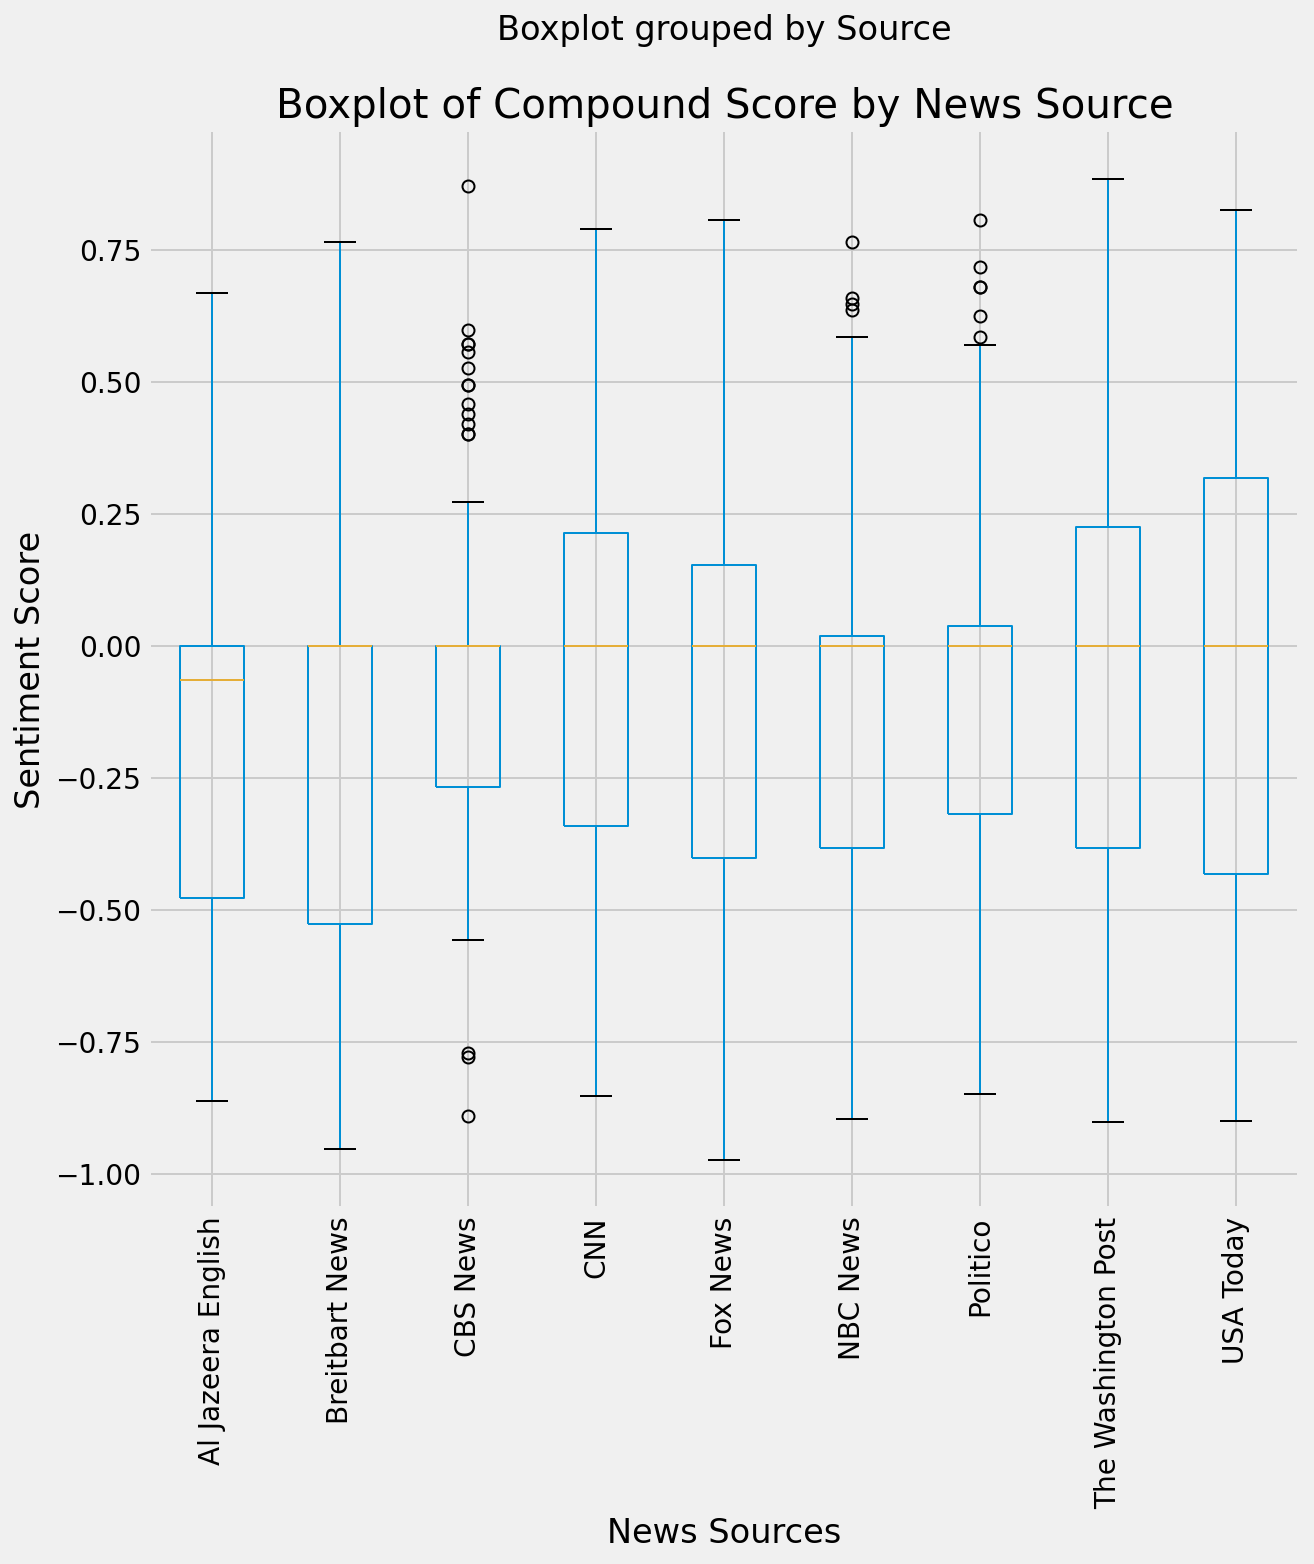

In [16]:
# Boxplot of compound scores by news sources
df.boxplot(column='compound score', by='Source', figsize=(10, 10)) 
plt.xticks(rotation='vertical')
plt.title('Boxplot of Compound Score by News Source')
plt.xlabel('News Sources')
plt.ylabel('Sentiment Score')
plt.show()

In [17]:
df_sentiments = df.copy()
for index, row in df_sentiments.iterrows():
    sentiment = row['Overall Sentiment']
    if sentiment == -1:
        df_sentiments.loc[index, 'Overall Sentiment'] = 'Negative'
    if sentiment == 0:
        df_sentiments.loc[index, 'Overall Sentiment'] = 'Neutral'
    if sentiment == 1:
        df_sentiments.loc[index, 'Overall Sentiment'] = 'Positive'
        
df_sentiments

,Keyword,Source,Author,Title,URL,Text,Published,compound score,negative score,positive score,neutral score,Overall Sentiment,Source Bias
0,immigration,The Washington Post,Nick Miroff,Hospital where activists say ICE detainees wer...,https://www.washingtonpost.com/immigration/ice...,According to a complaint filed last week by im...,2020-09-22T20:10:00Z,0.0000,0.000,0.000,1.000,Neutral,-3.7
1,immigration,The Washington Post,"Nick Miroff, Devlin Barrett",ICE preparing targeted arrests in ‘sanctuary c...,https://www.washingtonpost.com/immigration/tru...,"Chad Wolf, acting secretary of the Department ...",2020-09-29T22:37:00Z,-0.4404,0.182,0.000,0.818,Negative,-3.7
2,immigration,The Washington Post,Nick Miroff,"Trump cuts refugee cap to lowest level ever, d...",https://www.washingtonpost.com/immigration/tru...,"The 15,000 figure, the lowest since the 1980 R...",2020-10-01T18:07:00Z,-0.8779,0.410,0.000,0.590,Negative,-3.7
3,immigration,The Washington Post,"Devlin Barrett, The Washington Post","Seattle, Portland...",http://www.washingtonpost.com/national-securit...,WASHINGTON - The Justice Department labeled th...,2020-09-21T13:34:38Z,0.0000,0.000,0.000,1.000,Neutral,-3.7
4,immigration,The Washington Post,Lizette Alvarez,Biden abandoned Florida. Trump could clinch it...,https://www.washingtonpost.com/opinions/2020/0...,Conventional wisdom holds that President Trump...,2020-09-25T17:33:00Z,0.1531,0.153,0.184,0.663,Neutral,-3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,refugees,Al Jazeera English,Al Jazeera,Delhi summons top Facebook India official in h...,https://www.aljazeera.com/news/2020/09/delhi-s...,The administration in India's capital has summ...,2020-09-12T11:28:27Z,-0.4404,0.274,0.133,0.593,Negative,-4.4
1473,refugees,Al Jazeera English,Al Jazeera,"Facebook bias spurs violence in India, US righ...",https://www.aljazeera.com/news/2020/09/faceboo...,Civil rights groups on Wednesday said Facebook...,2020-09-10T07:50:38Z,-0.6705,0.407,0.000,0.593,Negative,-4.4
1474,refugees,Al Jazeera English,Al Jazeera,Palestinians rally against Bahrain-Israel norm...,https://www.aljazeera.com/news/2020/09/palesti...,Palestinians in Gaza burned pictures of Israel...,2020-09-12T18:04:47Z,0.0000,0.000,0.000,1.000,Neutral,-4.4
1475,refugees,Al Jazeera English,Farah Najjar,What is behind Bahrain's normalisation deal wi...,https://www.aljazeera.com/news/2020/09/cloneof...,Twenty-six years after Bahrain welcomed an Isr...,2020-09-13T19:52:06Z,0.0000,0.000,0.000,1.000,Neutral,-4.4


In [18]:
# Bar graph of sentiment labels by news source
sentiments_grouped = df_sentiments[['Source', 'Overall Sentiment', 'Title']].groupby(['Source', 'Overall Sentiment']).count()
sentiments = sentiments_grouped.reset_index()
sentiments

,Source,Overall Sentiment,Title
0,Al Jazeera English,Negative,85
1,Al Jazeera English,Neutral,79
2,Al Jazeera English,Positive,18
3,Breitbart News,Negative,125
4,Breitbart News,Neutral,119
5,Breitbart News,Positive,49
6,CBS News,Negative,20
7,CBS News,Neutral,40
8,CBS News,Positive,14
9,CNN,Negative,46


In [19]:
# Create new dataframe of number of headlines with each overall sentiment by source 
sentiment_new = pd.pivot_table(sentiments, index='Source', columns='Overall Sentiment', values ='Title')
sentiment_new

Overall Sentiment,Negative,Neutral,Positive
Source,,,
Al Jazeera English,85,79,18
Breitbart News,125,119,49
CBS News,20,40,14
CNN,46,63,38
Fox News,72,71,46
NBC News,54,59,29
Politico,38,53,27
The Washington Post,63,77,53
USA Today,52,47,40


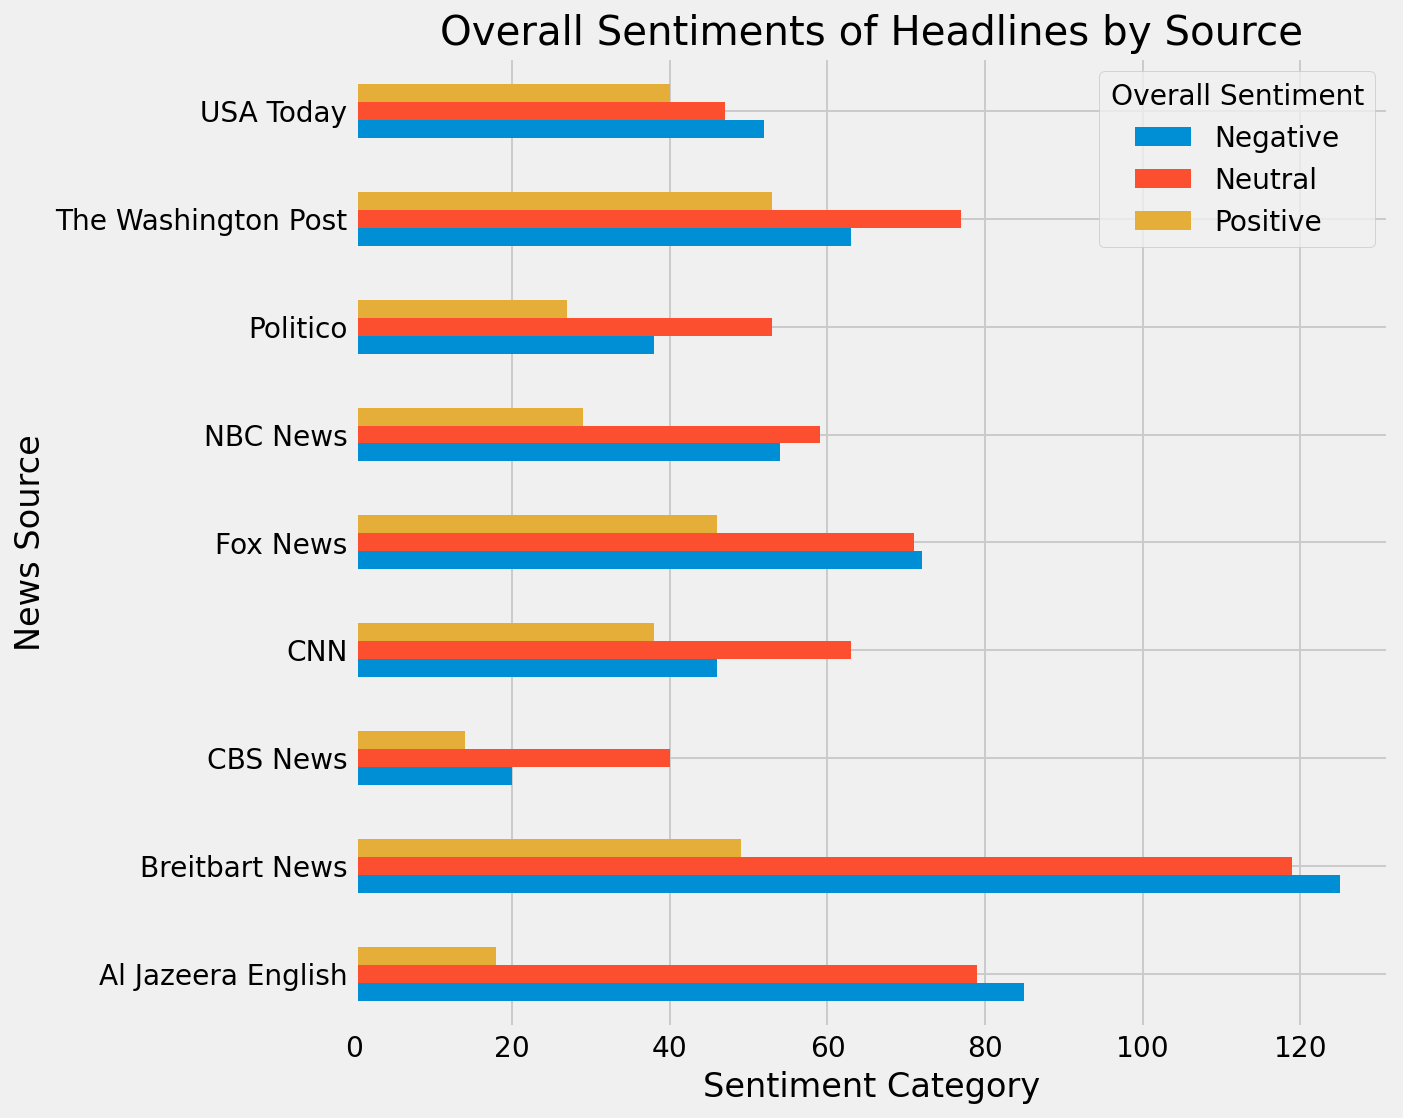

In [20]:
# Bar graph of number of sentiment score types by source
sentiment_new.plot.barh(figsize=(10, 8), title = 'Overall Sentiments of Headlines by Source')
plt.xlabel('Sentiment Category')
plt.ylabel('News Source')
plt.tight_layout()

In [21]:
def process_corpus(titles):
    tokens = []
    for title in titles:
        tokenizer = RegexpTokenizer(r'\w+')
        toks = tokenizer.tokenize(title)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    return tokens

In [22]:
# Determine most frequent words in all headlines
headlines = list(df['Title'])
headlines_tokens = process_corpus(headlines)
headlines_freq = nltk.FreqDist(headlines_tokens)
top_terms_all = headlines_freq.most_common(20)
top_terms_all

[('trump', 349),
 ('biden', 138),
 ('court', 85),
 ('new', 81),
 ('covid', 74),
 ('coronavirus', 67),
 ('migrants', 66),
 ('migrant', 61),
 ('us', 60),
 ('says', 57),
 ('debate', 55),
 ('u', 49),
 ('harris', 49),
 ('voters', 48),
 ('19', 48),
 ('supreme', 47),
 ('election', 43),
 ('border', 43),
 ('ice', 39),
 ('barrett', 37)]

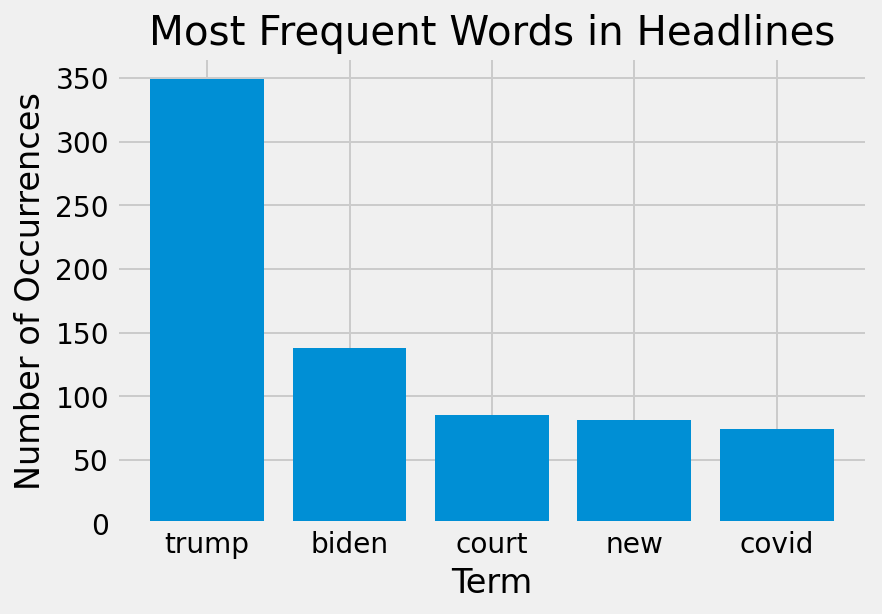

In [23]:
# Graph top 5 terms in all headlines
terms = []
counts = []
for value in range (0,5):
    term = top_terms_all[value][0]
    count = top_terms_all[value][1]
    terms.append(term)
    counts.append(count)
    
plt.bar(terms, counts)
plt.xlabel('Term')
plt.ylabel('Number of Occurrences')
plt.title('Most Frequent Words in Headlines')
plt.show()


    

In [24]:
# Determine most frequent words in positive headlines
pos_headlines = list(df.loc[df['Overall Sentiment']==1]['Title'])
pos_headlines_tokens = process_corpus(pos_headlines)
pos_headlines_freq = nltk.FreqDist(pos_headlines_tokens)
top_terms_pos = pos_headlines_freq.most_common(20)
top_terms_pos

[('trump', 88),
 ('court', 44),
 ('supreme', 41),
 ('biden', 29),
 ('justice', 21),
 ('amy', 18),
 ('coney', 18),
 ('barrett', 18),
 ('new', 16),
 ('says', 15),
 ('voters', 15),
 ('coronavirus', 15),
 ('like', 14),
 ('covid', 14),
 ('harris', 14),
 ('democrats', 13),
 ('help', 13),
 ('ginsburg', 13),
 ('election', 12),
 ('could', 12)]

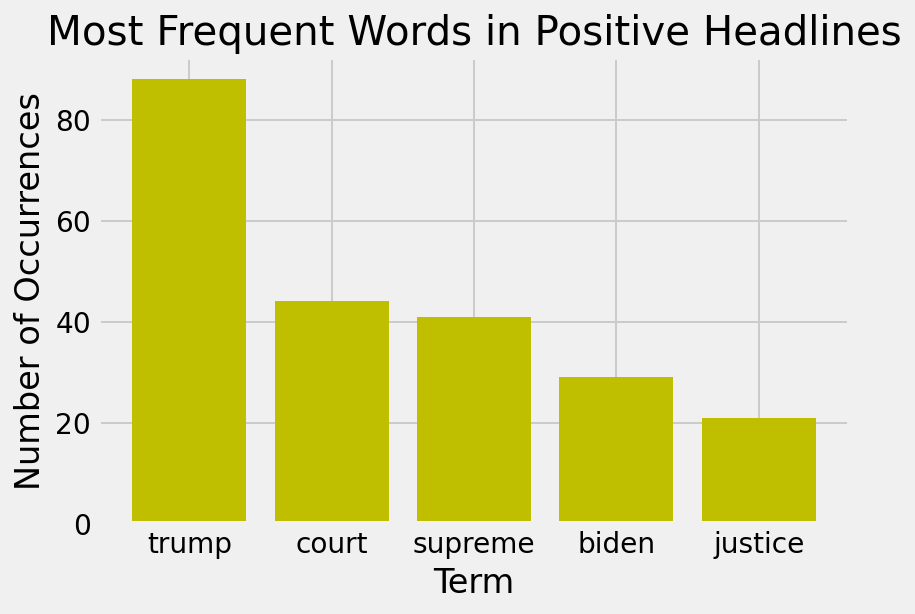

In [25]:
# Graph top 5 terms in positive headlines
terms_pos = []
counts_pos = []
for value in range (0,5):
    term = top_terms_pos[value][0]
    count = top_terms_pos[value][1]
    terms_pos.append(term)
    counts_pos.append(count)
    
plt.bar(terms_pos, counts_pos, color='y')
plt.xlabel('Term')
plt.ylabel('Number of Occurrences')
plt.title('Most Frequent Words in Positive Headlines')
plt.show()

In [26]:
# Determine most frequent words in negative headlines
neg_headlines = list(df.loc[df['Overall Sentiment']==-1]['Title'])
neg_headlines_tokens = process_corpus(neg_headlines)
neg_headlines_freq = nltk.FreqDist(neg_headlines_tokens)
top_terms_neg = neg_headlines_freq.most_common(20)
top_terms_neg

[('trump', 126),
 ('biden', 48),
 ('new', 38),
 ('illegal', 33),
 ('migrants', 32),
 ('migrant', 31),
 ('covid', 27),
 ('us', 26),
 ('ice', 25),
 ('death', 22),
 ('court', 21),
 ('says', 21),
 ('border', 21),
 ('crisis', 18),
 ('19', 18),
 ('election', 17),
 ('voters', 17),
 ('pandemic', 17),
 ('camp', 17),
 ('fight', 16)]

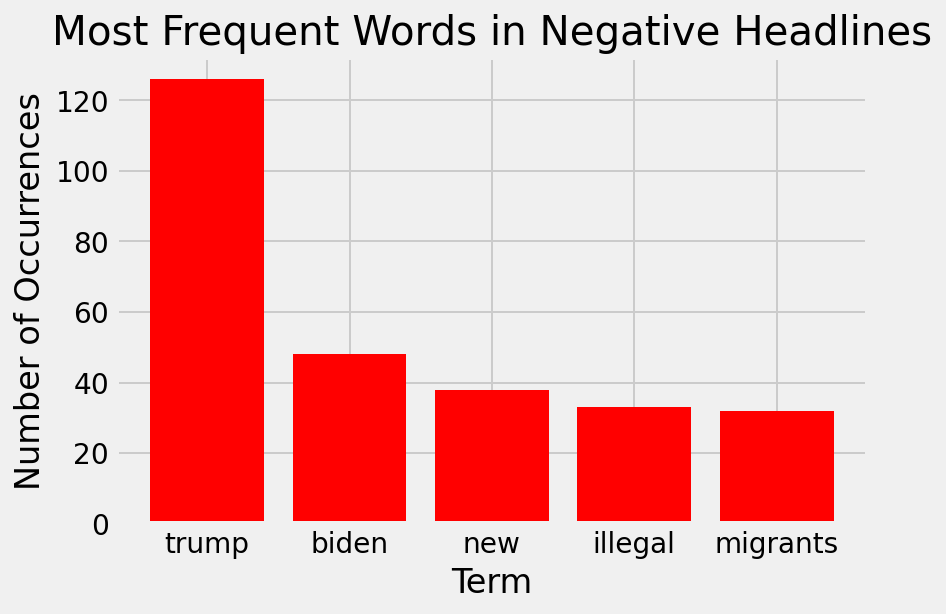

In [27]:
# Graph top 5 terms in negative headlines
terms_neg = []
counts_neg = []
for value in range (0,5):
    term = top_terms_neg[value][0]
    count = top_terms_neg[value][1]
    terms_neg.append(term)
    counts_neg.append(count)
    
plt.bar(terms_neg, counts_neg, color='r')
plt.xlabel('Term')
plt.ylabel('Number of Occurrences')
plt.title('Most Frequent Words in Negative Headlines')
plt.show()

In [42]:
# Function which creates a fancy word cloud
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

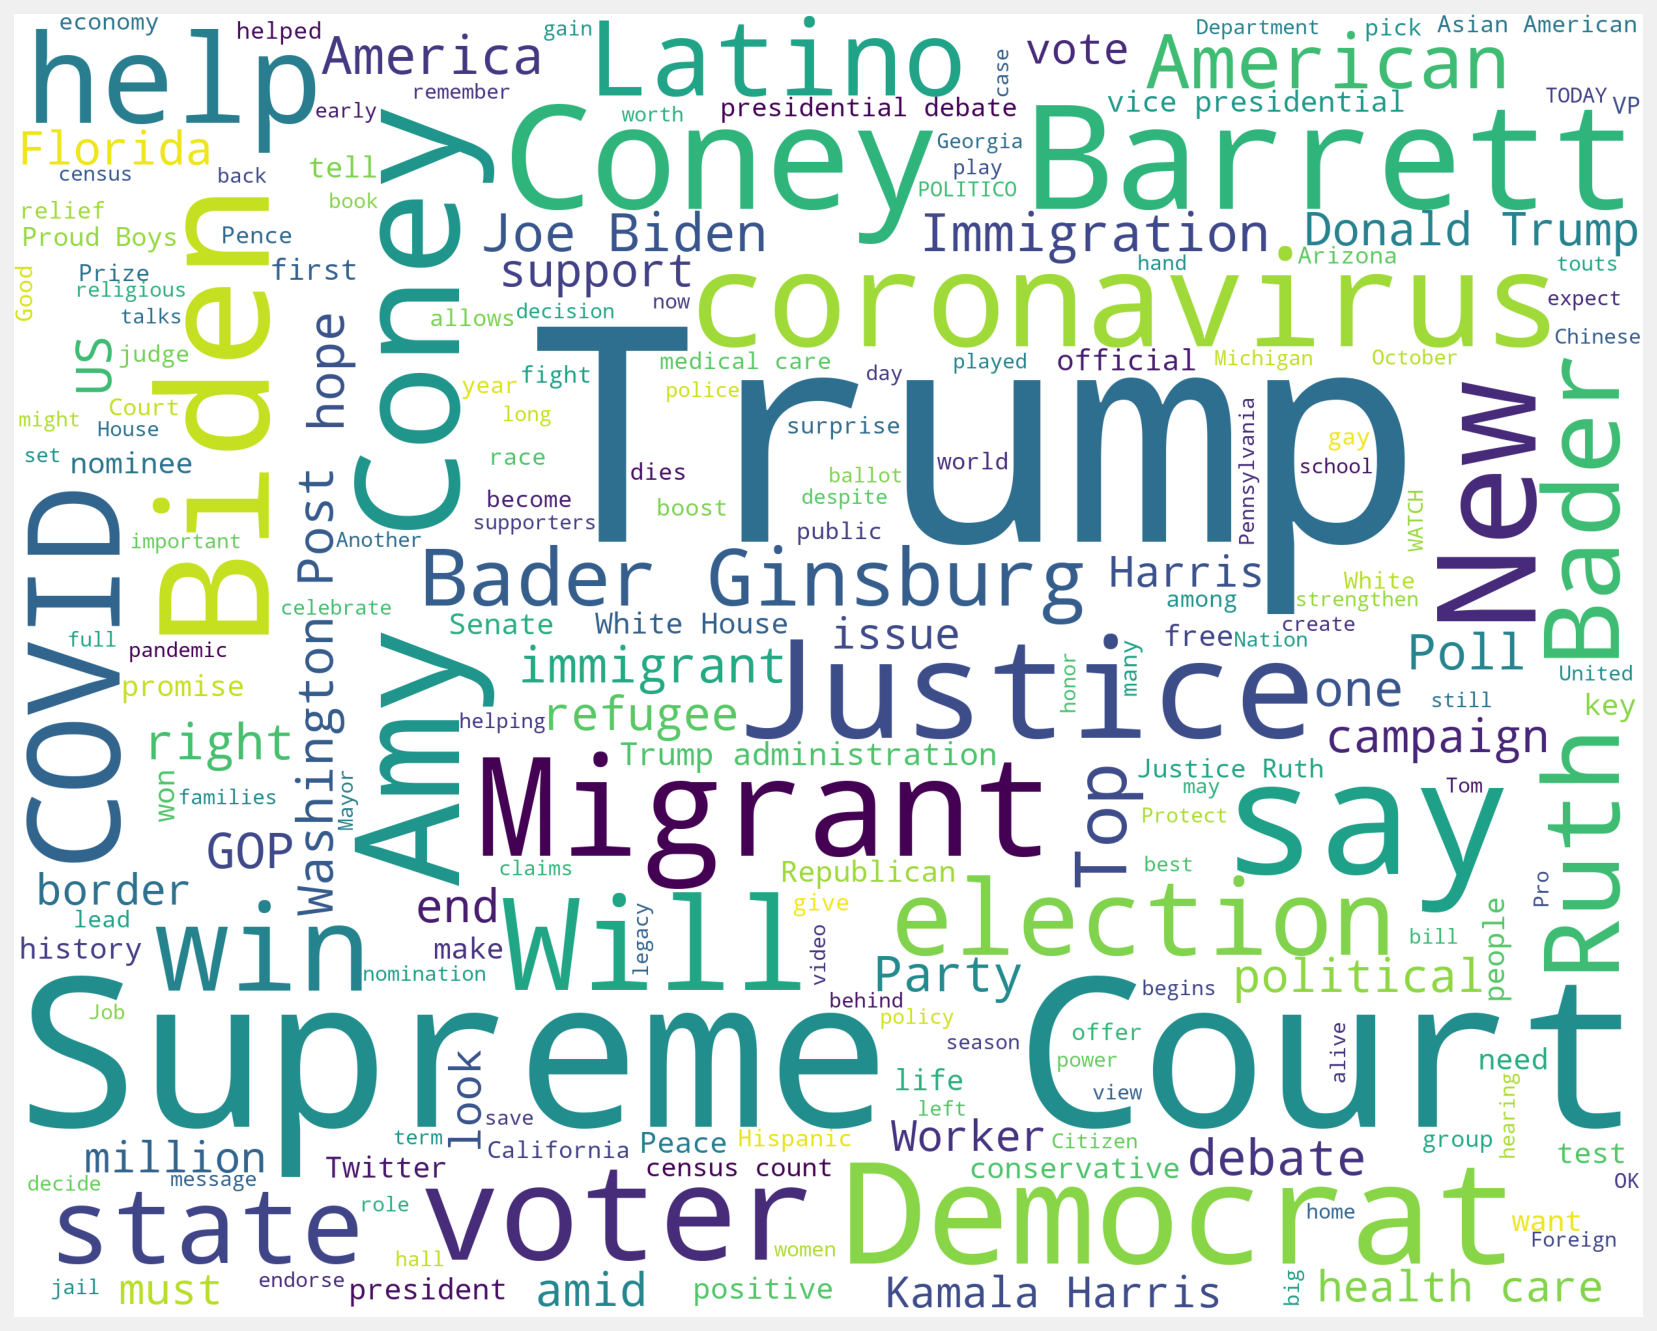

In [43]:
# Prettier word cloud of positive headlines
wordcloud_draw(pos_headlines,'white')

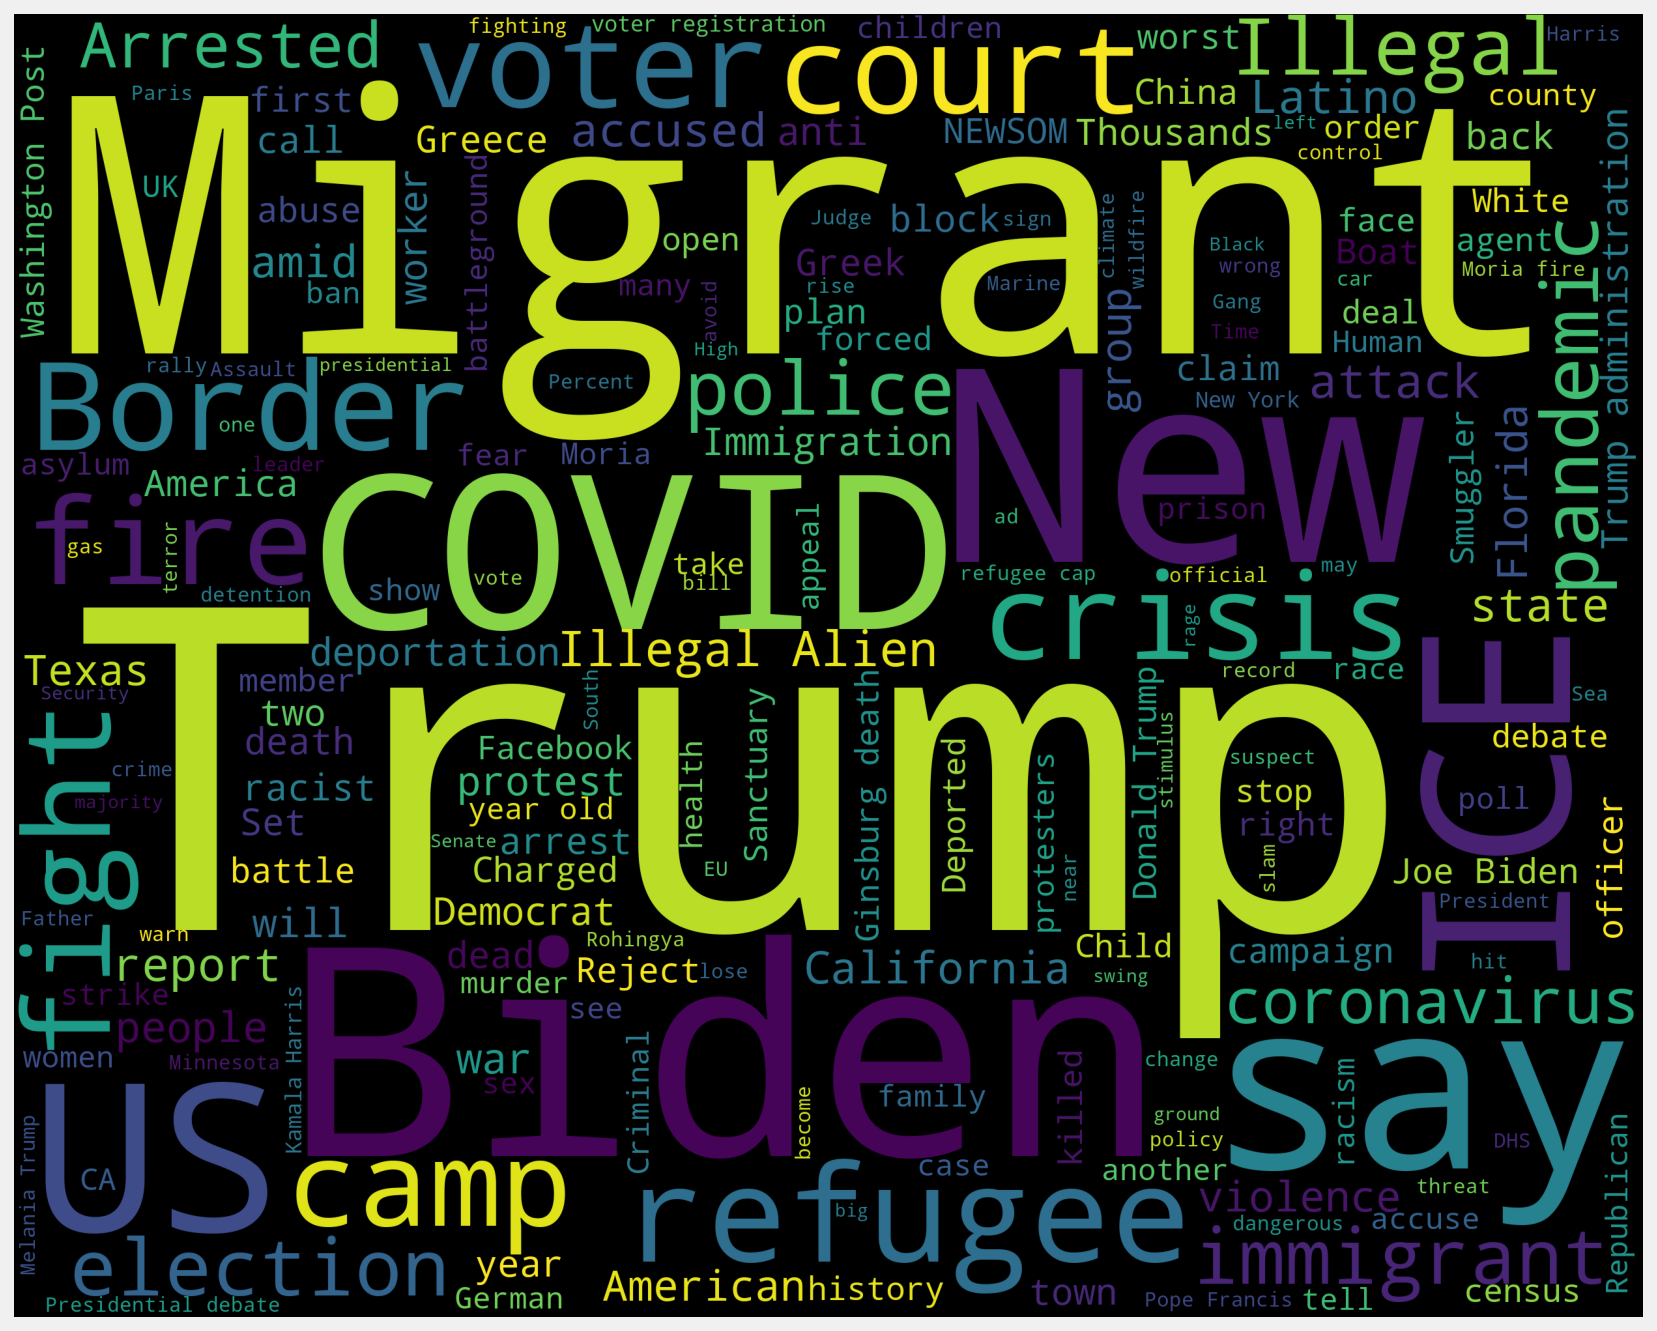

In [44]:
# Prettier word cloud of negative headlines
wordcloud_draw(neg_headlines, 'black')